In [ ]:
#Importing necessary library

In [2]:
import pandas as pd

In [3]:
import ast # For safely parsing strings as lists

In [4]:
#Read csv file

In [5]:
retail_data = pd.read_csv("Retail_Transactions_Dataset.csv")

In [4]:
retail_data.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,21-01-2022 06:27,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,01-03-2023 13:01,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,21-03-2024 15:37,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,31-10-2020 09:59,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,10-12-2020 00:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [ ]:
# Convert 'Date' column to datetime

In [5]:
retail_data['Date'] = pd.to_datetime(retail_data['Date'], format='%d-%m-%Y %H:%M')

In [6]:
retail_data.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,21-01-2022 06:27,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,01-03-2023 13:01,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,21-03-2024 15:37,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,31-10-2020 09:59,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,10-12-2020 00:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [ ]:
# Parse the 'Product' column (convert string representation of lists to actual lists)

In [7]:
retail_data['Product'] = retail_data['Product'].apply(ast.literal_eval)

In [ ]:
# Check if the preprocessing is successful

In [8]:
retail_data[['Date', 'Product']].head()

,Date,Product
0,2022-01-21 06:27:00,"[Ketchup, Shaving Cream, Light Bulbs]"
1,2023-03-01 13:01:00,"[Ice Cream, Milk, Olive Oil, Bread, Potatoes]"
2,2024-03-21 15:37:00,[Spinach]
3,2020-10-31 09:59:00,"[Tissues, Mustard]"
4,2020-12-10 00:59:00,[Dish Soap]


In [ ]:
# Making the new cleaned data

In [23]:
retail_data.to_csv('retail_transactions_Cleaned.csv', index=False)

In [24]:
retail_data.to_excel('retail_transactions_Cleaned.xlsx', index=False)

In [ ]:
# Importing necessary libraries

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [ ]:
#  Create a 'Month-Year' column for monthly analysis

In [14]:
retail_data['Month-Year'] = retail_data['Date'].dt.to_period('M')

In [ ]:
# Group by 'Month-Year' to analyze transaction counts over time

In [15]:
monthly_transactions = retail_data.groupby('Month-Year').size()

In [ ]:
# Plot transaction trends over time

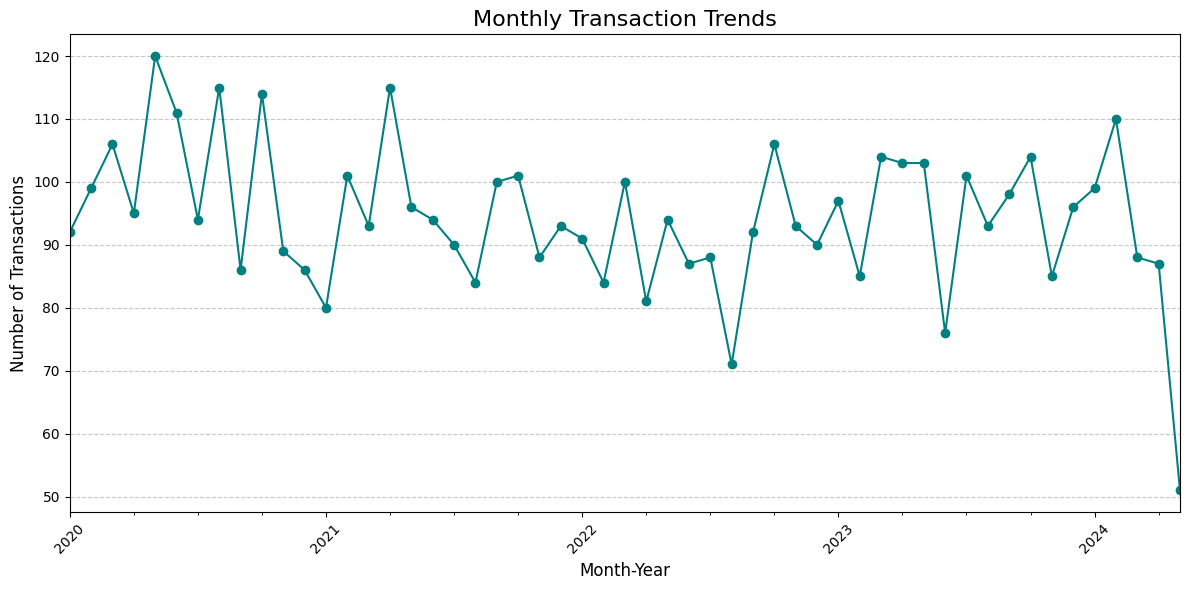

In [16]:
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Transaction Trends', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()